In [1]:
%matplotlib inline
import pandas as pd
from plotnine import *
import numpy as np
import math

In [2]:
def rk4(func, initial, deltas):
    ys = [initial]
    for i in range(1, len(xs)):
        old = np.array(ys[-1][:])
        dt = .01
        d1 = np.array(func(old, xs[i])) * dt
        d2 = np.array(func(old + 0.5 * d1, xs[i] + 0.5 * dt)) * dt
        d3 = np.array(func(old + 0.5 * d2, xs[i] + 0.5 * dt)) * dt
        d4 = np.array(func(old + d3, xs[i] + dt)) * dt
        better = old + ((d1 + 2 * d2 + 2 * d3 + d4) / 6.0)
        ys.append(better)
    return np.array(ys)

I got the runga-kutta model from [this](https://nbviewer.jupyter.org/urls/hendrix-cs.github.io/csci285/assets/code/Epidemiology.ipynb) notebook.

In [3]:
s = 4
xr = (-8/5)
a = 1
b = 3
c = 1
d = 5
r = 10**(-3)
I = 2
x = 1
y = 1
z = 2
dt = .01
sim_length = 2000


In [4]:
def hindmarsh_rose(u, t):
    x, y, z = u
    dx = (y + ((-a*(x**3)) + (b*(x**2)))  - z + I)
    dy = ((c-(d*(x**2))) -y)
    dz = (r*(s*(x-xr)-z))
    return np.array([dx, dy, dz])

xs = np.linspace(0, sim_length, sim_length * 300)
ys = rk4(hindmarsh_rose, [x, y, z], xs)

The equations in the hindmarsh_rose method and many of the values found above were used from [this](https://en.wikipedia.org/wiki/Hindmarsh%E2%80%93Rose_model) site.

In [5]:
df = pd.DataFrame(ys, columns=["Membrane Potential", "Spiking Variable", "Adaption Current"])
df["Time"] = xs

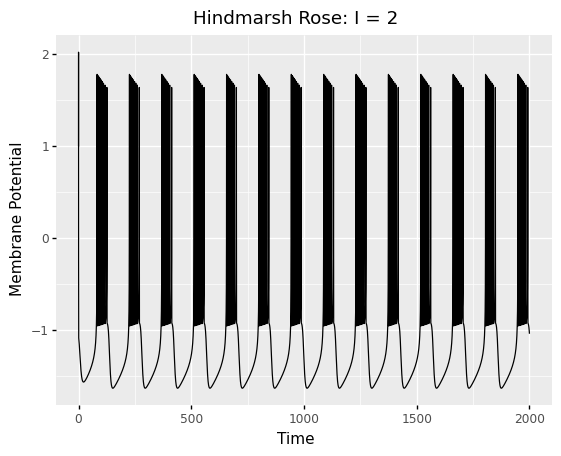

<ggplot: (-9223371962155323808)>

In [6]:
ggplot(df, aes(x="Time", y="Membrane Potential")) \
+ geom_line() \
+ labs(title="Hindmarsh Rose: I = 2")

The graph above models the magnitude of the membrane potential over time. This is a very similar looking graph to the one found on the Wikepedia page, although this is stretched out more. 

In [7]:
I = 1
xs = np.linspace(0, sim_length, sim_length * 300)
ys = rk4(hindmarsh_rose, [x, y, z], xs)

In [8]:
df = pd.DataFrame(ys, columns=["Membrane Potential", "Spiking Variable", "Adaption Current"])
df["Time"] = xs

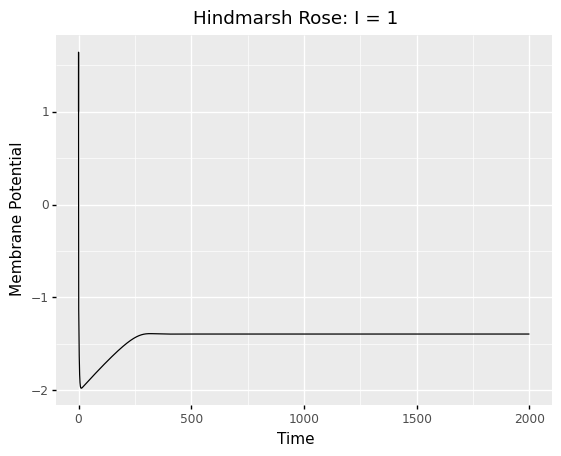

<ggplot: (-9223371962152769724)>

In [9]:
ggplot(df, aes(x="Time", y="Membrane Potential")) \
+ geom_line() \
+ labs(title="Hindmarsh Rose: I = 1")

This model is exactly the same as the one before, except now instead of 'I' equaling 2, it now equals 1. This small change can make a very dramatic difference.

In [10]:
I = 2
def hindmarsh_rose(u, t):
    global I
    if t%400 < 1:
        if I == 1:
            I = 2
        else:
            I = 1
    x, y, z = u
    dx = (y + ((-a*(x**3)) + (b*(x**2)))  - z + I)
    dy = ((c-(d*(x**2))) -y)
    dz = (r*(s*(x-xr)-z))
    
    return np.array([dx, dy, dz])

xs = np.linspace(0, sim_length, sim_length * 300)
ys = rk4(hindmarsh_rose, [x, y, z], xs)

In [11]:
df = pd.DataFrame(ys, columns=["Membrane Potential", "Spiking Variable", "Adaption Current"])
df["Time"] = xs
df

,Membrane Potential,Spiking Variable,Adaption Current,Time
0,1.000000,1.000000,2.000000,0.000000
1,1.025097,0.949074,2.000084,0.003333
2,1.050430,0.896084,2.000170,0.006667
3,1.075983,0.840964,2.000256,0.010000
4,1.101739,0.783648,2.000344,0.013333
...,...,...,...,...
599995,-1.394377,-8.721439,0.822494,1999.986667
599996,-1.394377,-8.721439,0.822494,1999.990000
599997,-1.392711,-8.721439,0.822494,1999.993333
599998,-1.388384,-8.720777,0.822495,1999.996667


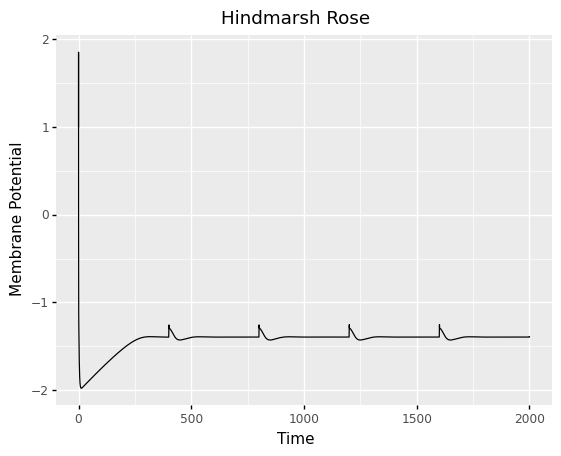

<ggplot: (-9223371962145202776)>

In [12]:
ggplot(df, aes(x="Time", y="Membrane Potential")) \
+ geom_line() \
+ labs(title="Hindmarsh Rose")

In this model, 'I' alternates between 2 and 1 every 400 timesteps. It should be noted that if 'I' were to start out as 1 instead of 2, a much different graph would have appeared.

# Section 2

In [13]:
polls = pd.read_csv("president_polls.csv")

In [14]:
polls

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,134618,71824,2020,Pennsylvania,801,Gravis Marketing,NaN,NaN,Gravis Marketing,124.0,...,10/24/20 14:47,NaN,https://gravismarketing.com/2020-pa-poll-results/,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,51.0
1,134618,71824,2020,Pennsylvania,801,Gravis Marketing,NaN,NaN,Gravis Marketing,124.0,...,10/24/20 14:47,NaN,https://gravismarketing.com/2020-pa-poll-results/,general,6249,Trump,13254,Donald Trump,REP,44.0
2,134726,71877,2020,Wisconsin,801,Gravis Marketing,NaN,NaN,Gravis Marketing,124.0,...,10/24/20 22:22,NaN,https://gravismarketing.com/wp-content/uploads...,general,6259,Biden,13256,Joseph R. Biden Jr.,DEM,54.0
3,134726,71877,2020,Wisconsin,801,Gravis Marketing,NaN,NaN,Gravis Marketing,124.0,...,10/24/20 22:22,NaN,https://gravismarketing.com/wp-content/uploads...,general,6259,Trump,13254,Donald Trump,REP,43.0
4,134619,71825,2020,NaN,1193,SurveyMonkey,788,Axios,SurveyMonkey,324.0,...,10/24/20 19:50,NaN,https://www.tableau.com/data-insights/us-elect...,general,6210,Biden,13256,Joseph R. Biden Jr.,DEM,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13356,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
13357,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0
13358,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,49.0
13359,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210,Obama,13253,Michelle Obama,DEM,50.0


This csv file can be found [here](https://projects.fivethirtyeight.com/2020-election-forecast/).

In [15]:
polls["created_at"] = pd.to_datetime(polls["created_at"])

In [16]:
most_recents = {}
for row in polls.itertuples():
    if not pd.isnull(row[4]) and not pd.isnull(row[-10]) and not (any(c.isdigit() for c in row[4])):
        if row[4] not in most_recents:
            most_recents[row[4]] = row[-10]
        else:
            if most_recents[row[4]] < row[-10]:
                most_recents[row[4]] = row[-10]
            
            
print(most_recents)
print(len(most_recents))

{'Pennsylvania': Timestamp('2020-10-24 19:55:00'), 'Wisconsin': Timestamp('2020-10-24 22:22:00'), 'Wyoming': Timestamp('2020-10-24 19:54:00'), 'West Virginia': Timestamp('2020-10-24 19:54:00'), 'Vermont': Timestamp('2020-10-24 19:54:00'), 'Virginia': Timestamp('2020-10-24 19:54:00'), 'Utah': Timestamp('2020-10-24 19:54:00'), 'Texas': Timestamp('2020-10-24 19:54:00'), 'Tennessee': Timestamp('2020-10-24 19:54:00'), 'South Dakota': Timestamp('2020-10-24 19:54:00'), 'South Carolina': Timestamp('2020-10-24 19:54:00'), 'Rhode Island': Timestamp('2020-10-24 19:54:00'), 'Ohio': Timestamp('2020-10-24 19:55:00'), 'New Mexico': Timestamp('2020-10-24 19:55:00'), 'New Jersey': Timestamp('2020-10-24 19:55:00'), 'Nebraska': Timestamp('2020-10-24 19:55:00'), 'North Dakota': Timestamp('2020-10-24 19:55:00'), 'Montana': Timestamp('2020-10-24 19:55:00'), 'Mississippi': Timestamp('2020-10-24 19:55:00'), 'Missouri': Timestamp('2020-10-24 19:55:00'), 'Maine': Timestamp('2020-10-24 19:56:00'), 'Maryland': Ti

This was done so we can gather only the most recent polling data.

In [17]:
important_poll_data = pd.DataFrame()

In [18]:
sample_size = []
answer = []
percent = []
date = []
state = []
standard_dev = []
for row in polls.itertuples():
    if row[-10] in most_recents.values() and row[-5] == "Biden" and row[4] not in state and not pd.isnull(row[4]):
        sample_size.append(row[13])
        answer.append(row[-5])
        percent.append(row[-1]/100)
        date.append(row[-10])
        state.append(row[4])
        standard_dev.append((1 / (2 * math.sqrt(row[13]))))
important_poll_data["Sample Size"] = sample_size
important_poll_data["Answer"] = answer
important_poll_data["Percent"] = percent
important_poll_data["Date"] = date
important_poll_data["State"] = state
important_poll_data["Standard_dev"] = standard_dev
important_poll_data


,Sample Size,Answer,Percent,Date,State,Standard_dev
0,677.0,Biden,0.54,2020-10-24 22:22:00,Wisconsin,0.019217
1,638.0,Biden,0.31,2020-10-24 19:54:00,Wyoming,0.019795
2,1223.0,Biden,0.33,2020-10-24 19:54:00,West Virginia,0.014297
3,969.0,Biden,0.67,2020-10-24 19:54:00,Vermont,0.016062
4,6765.0,Biden,0.55,2020-10-24 19:54:00,Virginia,0.006079
5,2398.0,Biden,0.45,2020-10-24 19:54:00,Utah,0.010210
6,14436.0,Biden,0.47,2020-10-24 19:54:00,Texas,0.004161
7,4565.0,Biden,0.42,2020-10-24 19:54:00,Tennessee,0.007400
8,928.0,Biden,0.43,2020-10-24 19:54:00,South Dakota,0.016413
9,4313.0,Biden,0.45,2020-10-24 19:54:00,South Carolina,0.007613


This data frame is made so that it is easier to access and manipulate any data. 

In [19]:
electoral_votes = {}
electoral_votes["Alabama"] = 9
electoral_votes["Alaska"] = 3
electoral_votes["Arizona"] = 11
electoral_votes["Arkansas"] = 6
electoral_votes["California"] = 55
electoral_votes["Colorado"] = 9
electoral_votes["Connecticut"] = 7
electoral_votes["Delaware"] = 3
electoral_votes["District of Columbia"] = 3
electoral_votes["Florida"] = 29
electoral_votes["Georgia"] = 16
electoral_votes["Hawaii"] = 4
electoral_votes["Idaho"] = 4
electoral_votes["Illinois"] = 20
electoral_votes["Indiana"] = 11
electoral_votes["Iowa"] = 6
electoral_votes["Kansas"] = 6
electoral_votes["Kentucky"] = 8
electoral_votes["Louisiana"] = 8
electoral_votes["Maine"] = 4
electoral_votes["Maryland"] = 10
electoral_votes["Massachusetts"] = 11
electoral_votes["Michigan"] = 16
electoral_votes["Minnesota"] = 10
electoral_votes["Mississippi"] = 6
electoral_votes["Missouri"] = 10
electoral_votes["Montana"] = 3
electoral_votes["Nebraska"] = 5
electoral_votes["Nevada"] = 6
electoral_votes["New Hampshire"] = 4
electoral_votes["New Jersey"] = 14
electoral_votes["New Mexico"] = 5
electoral_votes["New York"] = 29
electoral_votes["North Carolina"] = 15
electoral_votes["North Dakota"] = 3
electoral_votes["Ohio"] = 18
electoral_votes["Oklahoma"] = 7
electoral_votes["Oregon"] = 7
electoral_votes["Pennsylvania"] = 20
electoral_votes["Rhode Island"] = 4
electoral_votes["South Carolina"] = 9
electoral_votes["South Dakota"] = 3
electoral_votes["Tennessee"] = 11
electoral_votes["Texas"] = 38
electoral_votes["Utah"] = 6
electoral_votes["Vermont"] = 3
electoral_votes["Virginia"] = 13
electoral_votes["Washington"] = 12
electoral_votes["West Virginia"] = 5
electoral_votes["Wisconsin"] = 10
electoral_votes["Wyoming"] = 3

I could not get the electoral college text file to work for me, so I made this dictionary to take its place. All data came from [here](https://raw.githubusercontent.com/chris-taylor/USElection/master/data/electoral-college-votes.csv)

C:\Users\Ian\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 59'. Pick better value with 'binwidth'.


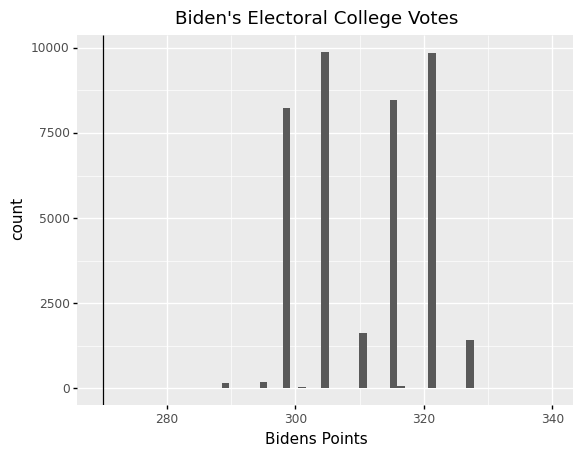

<ggplot: (-9223371962153425572)>

In [20]:
simulations = 40000
biden_points = []
for s in range(simulations):
    points = 0
    for row in important_poll_data.itertuples():
        if np.random.normal(row[3],row[-1]) > .5:
            points += electoral_votes[row[-2]]
    biden_points.append(points)
        
d = pd.DataFrame()
d["Bidens Points"] = biden_points
ggplot(d, aes(x="Bidens Points")) \
+ geom_histogram() \
+ geom_vline(xintercept=270) \
+ labs(title="Biden's Electoral College Votes")

In all of these simulations, Biden will win 100% of the time. This is only a very rough model of what would actually happen as we are using limited data and making several assumptions. Because of this, the model is not very close to the one found on the FiveThirtyEight website (found [here](https://projects.fivethirtyeight.com/2020-election-forecast/)). The assumptions that we were only using the most recent polling data and that people were either voting for Biden or Trump makes our model more skewed from actuality. The outcome of this data is very dependent on what day the data was collected since it changes every day.

I also figured out how to insert vertical lines with the help of [this](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_vline.html) website.

# Section 3

In [21]:
from mesa.datacollection import DataCollector

In [22]:
from mesa import Agent
import random


class Firefly(Agent):

    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id, model)
        self.pos = pos
        self.flash = False
        self.clock = random.randint(1, 11)

    def get_item(self, item):
        this_cell = self.model.grid.get_cell_list_contents([self.pos])
        for agent in this_cell:
            if type(agent) is item:
                return agent.flash

    def random_move(self):
        next_moves = self.model.grid.get_neighborhood(self.pos, True, False)
        next_move = self.random.choice(next_moves)
        self.model.grid.move_agent(self, next_move)

    def has_flashing_neighbors(self):

        neighbors = self.model.grid.get_neighborhood(self.pos, True, False)
        for n in neighbors:
            return self.get_item(n)

    def step(self):
        if self.flash:
            self.flash = False
        if self.clock == 1:
            self.flash = True
        self.clock += 1
        if self.clock > 10:
            self.clock = 1

        if self.has_flashing_neighbors:
            self.clock = 2

        self.random_move()

class Environment(Agent):

    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id,model)
        self.id = unique_id
        self.model = model
        self.pos = pos


In [23]:
from mesa import Model
from mesa.time import SimultaneousActivation
from mesa.space import MultiGrid

class FireflyWorld(Model):

    def __init__(self, height=30, width=30, fireflies=200):
        super().__init__()
        self.height = height
        self.width = width
        self.fireflies = fireflies
        self.flashing = 0

        self.schedule = SimultaneousActivation(self)
        self.grid = MultiGrid(height, width, torus=True)

        for x in range(self.width):
            for y in range(self.height):
                environment = Environment(self.next_id(), self, (x, y))
                self.grid.place_agent(environment, environment.pos)
                self.schedule.add(environment)
        for i in range(fireflies):
            x = self.random.randint(0, self.width - 1)
            y = self.random.randint(0, self.height - 1)
            firefly = Firefly(self.next_id(), self, (x, y))
            self.grid.place_agent(firefly, firefly.pos)
            self.schedule.add(firefly)
        self.dc = DataCollector({"Flashing": lambda m: self.flashing})



    def step(self):
        self.schedule.step()
        self.count()
        self.dc.collect(self)

        if self.schedule.time > 500:
            self.running = False

    def count(self):
        self.flashing = 0
        for x in range(self.width):
            for y in range(self.height):
                spot_agents = self.grid.get_cell_list_contents([(x, y)])
                for agent in spot_agents:
                    if type(agent) == Firefly:
                        if agent.flash == True:
                            self.flashing += 1



In [24]:
fireflies = FireflyWorld()
fireflies.run_model()
results = fireflies.dc.get_model_vars_dataframe()
results

,Flashing
0,8
1,0
2,0
3,0
4,0
...,...
496,0
497,0
498,0
499,0


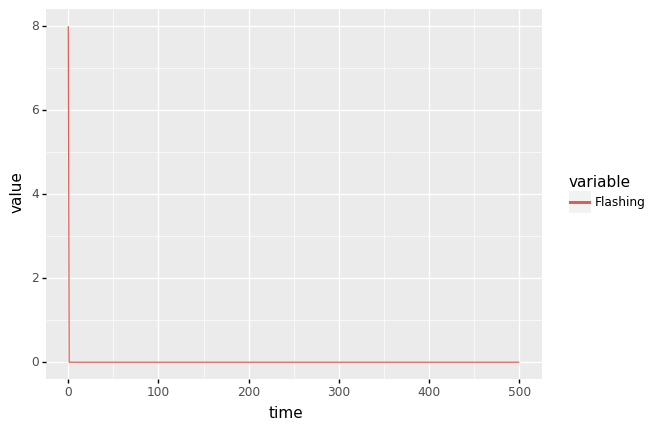

<ggplot: (-9223371962152690356)>

In [25]:
results["time"] = np.linspace(0, len(results) - 1, len(results))
resultsmelt = pd.melt(results, id_vars=["time"], value_vars=["Flashing"])
ggplot(resultsmelt, aes(x="time", y="value", color="variable")) \
+ geom_line()

I was unable to figure out what was wrong with my code, but what is above is what I managed to get down. It does not keep track of how many flashing fireflies there are, and I could not get my server to work as neither environment blocks or fireflies appear, except for one lone square in the bottom left corner. I could not find what was wrong easily since there would be no error messages on the command line. The alternate code where it flashes for two timesteps is found below.

In [26]:
from mesa import Agent
import random


class Firefly(Agent):

    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id, model)
        self.pos = pos
        self.flash = False
        self.clock = random.randint(1, 11)

    def get_item(self, item):
        this_cell = self.model.grid.get_cell_list_contents([self.pos])
        for agent in this_cell:
            if type(agent) is item:
                return agent.flash

    def random_move(self):
        next_moves = self.model.grid.get_neighborhood(self.pos, True, False)
        next_move = self.random.choice(next_moves)
        self.model.grid.move_agent(self, next_move)

    def has_flashing_neighbors(self):

        neighbors = self.model.grid.get_neighborhood(self.pos, True, False)
        for n in neighbors:
            return self.get_item(n)

    def step(self):
        if self.flash:
            self.flash = False
        if self.clock == 1 or self.clock == 2:
            self.flash = True
        self.clock += 1
        if self.clock > 10:
            self.clock = 1

        if self.has_flashing_neighbors:
            self.clock = 3

        self.random_move()

class Environment(Agent):

    def __init__(self, unique_id, model, pos):
        super().__init__(unique_id,model)
        self.id = unique_id
        self.model = model
        self.pos = pos


In [27]:
from mesa import Model
from mesa.time import SimultaneousActivation
from mesa.space import MultiGrid

class FireflyWorld(Model):

    def __init__(self, height=30, width=30, fireflies=200):
        super().__init__()
        self.height = height
        self.width = width
        self.fireflies = fireflies
        self.flashing = 0

        self.schedule = SimultaneousActivation(self)
        self.grid = MultiGrid(height, width, torus=True)

        for x in range(self.width):
            for y in range(self.height):
                environment = Environment(self.next_id(), self, (x, y))
                self.grid.place_agent(environment, environment.pos)
                self.schedule.add(environment)
        for i in range(fireflies):
            x = self.random.randint(0, self.width - 1)
            y = self.random.randint(0, self.height - 1)
            firefly = Firefly(self.next_id(), self, (x, y))
            self.grid.place_agent(firefly, firefly.pos)
            self.schedule.add(firefly)
        self.dc = DataCollector({"Flashing": lambda m: self.flashing})



    def step(self):
        self.schedule.step()
        self.count()
        self.dc.collect(self)

        if self.schedule.time > 500:
            self.running = False

    def count(self):
        self.flashing = 0
        for x in range(self.width):
            for y in range(self.height):
                spot_agents = self.grid.get_cell_list_contents([(x, y)])
                for agent in spot_agents:
                    if type(agent) == Firefly:
                        if agent.flash == True:
                            self.flashing += 1



In [28]:
fireflies = FireflyWorld()
fireflies.run_model()
results = fireflies.dc.get_model_vars_dataframe()
results

,Flashing
0,43
1,0
2,0
3,0
4,0
...,...
496,0
497,0
498,0
499,0


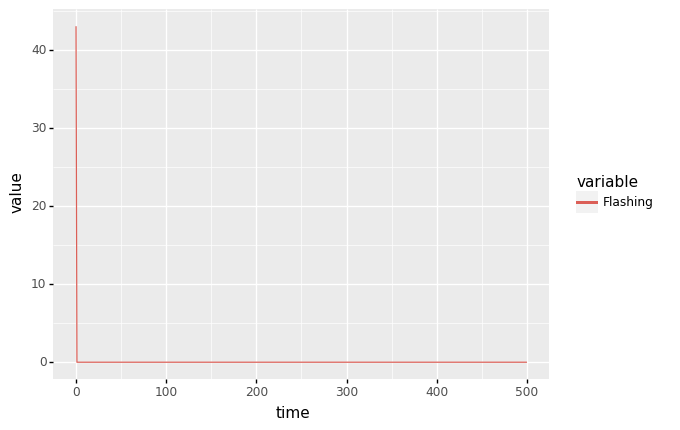

<ggplot: (-9223371962155328092)>

In [29]:
results["time"] = np.linspace(0, len(results) - 1, len(results))
resultsmelt = pd.melt(results, id_vars=["time"], value_vars=["Flashing"])
ggplot(resultsmelt, aes(x="time", y="value", color="variable")) \
+ geom_line()

I'm not sure why this one starts out with some fireflies being flashing, but they immediatly go away.